# Woche 9: Machine Learning 1 - Übung am eigenen Projekt

**Ziel dieser Übung:** Nachdem Sie die wichtigsten ML-Konzepte kennengelernt haben, wenden Sie Ihr erstes Machine Learning Modell auf Ihren eigenen bereinigten Datensatz an.

**Arbeitsweise:**
- Arbeiten Sie die Aufgaben nacheinander durch
- Entscheiden Sie zunächst, ob Ihr Problem ein Classification- oder Regression-Problem ist
- Nutzen Sie die Code-Zellen für Ihre Implementierung
- Orientieren Sie sich an den Beispielen aus den Slides
- Evaluieren Sie Ihr Modell und dokumentieren Sie (ganz wichtig!) die Ergebnisse

**Wichtig:** Machine Learning ist optional für Ihr Projekt! Wenn Ihr Datensatz oder Ihre Forschungsfrage sich nicht für ML eignet, können Sie diese Woche auch überspringen und sich auf Visualisierungen und Streamlit konzentrieren.

---
## 1. Bibliotheken importieren und Daten einlesen

**Aufgabe:** Importieren Sie die notwendigen Bibliotheken und laden Sie Ihren bereinigten Datensatz aus Woche 7.

**Hinweise:**
- Importieren Sie: `pandas`, `numpy`, `matplotlib.pyplot`, `seaborn`
- Importieren Sie sklearn Module: `train_test_split`, verschiedene Modelle, Metriken
- Laden Sie Ihren bereinigten CSV-Datensatz

In [65]:
# Bibliotheken importieren
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn Imports
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score

# Warnungen unterdrücken (optional)
import warnings
warnings.filterwarnings('ignore')

# Zufallsseed für Reproduzierbarkeit
np.random.seed(42)

# Bereinigten Datensatz einlesen
df = pd.read_csv('../data/processed/exam_score_prediction_cleaned.csv')


---
## 2. Überblick über den Datensatz

**Aufgabe:** Verschaffen Sie sich -wie immer- einen Überblick über Ihren Datensatz.

**Was Sie prüfen sollten:**
- Dimensionen des Datensatzes
- Datentypen der Spalten
- Statistische Kennzahlen
- Erste Zeilen anzeigen

In [66]:
# Dimensionen
print(f"Datensatz: {df.shape[0]} Zeilen, {df.shape[1]} Spalten")

# Erste Zeilen
print(f"\nErste 5 Zeilen:")
display(df.head())

# Informationen zu Spalten
print(f"\nVerfügbare Spalten:")
print(df.info())

# Statistische Übersicht für numerische Spalten
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
numeric_cols = numeric_cols[1:]
print(f"\nNumerische Spalten: {list(numeric_cols)}")
print("\nStatistik der wichtigsten Features:")
display(df[numeric_cols].describe())


Datensatz: 20000 Zeilen, 13 Spalten

Erste 5 Zeilen:


,Unnamed: 0,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,0,17,male,Diploma,2.78,92.9,True,7.4,poor,coaching,low,hard,58.9
1,1,23,other,B.Sc.,3.37,64.8,True,4.6,average,online videos,medium,moderate,54.8
2,2,22,male,B.Sc.,7.88,76.8,True,8.5,poor,coaching,high,moderate,90.3
3,3,20,other,Diploma,0.67,48.4,True,5.8,average,online videos,low,moderate,29.7
4,4,20,female,Diploma,0.89,71.6,True,9.8,poor,coaching,low,moderate,43.7



Verfügbare Spalten:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        20000 non-null  int64  
 1   age               20000 non-null  int64  
 2   gender            20000 non-null  object 
 3   course            20000 non-null  object 
 4   study_hours       20000 non-null  float64
 5   class_attendance  20000 non-null  float64
 6   internet_access   20000 non-null  bool   
 7   sleep_hours       20000 non-null  float64
 8   sleep_quality     20000 non-null  object 
 9   study_method      20000 non-null  object 
 10  facility_rating   20000 non-null  object 
 11  exam_difficulty   20000 non-null  object 
 12  exam_score        20000 non-null  float64
dtypes: bool(1), float64(4), int64(2), object(6)
memory usage: 1.9+ MB
None

Numerische Spalten: ['age', 'study_hours', 'class_attendance', 'sleep_hours', 'exam_scor

,age,study_hours,class_attendance,sleep_hours,exam_score
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000
mean,20.473300,4.007604,70.017365,7.00856,62.513225
std,2.284458,2.308313,17.282262,1.73209,18.908491
min,17.000000,0.080000,40.600000,4.10000,19.599000
25%,18.000000,2.000000,55.100000,5.50000,48.800000
50%,20.000000,4.040000,69.900000,7.00000,62.600000
75%,22.000000,6.000000,85.000000,8.50000,76.300000
max,24.000000,7.910000,99.400000,9.90000,100.000000


---
## 3. ML Problem-Typ identifizieren

**Aufgabe:** Entscheiden Sie, welchen Typ von ML-Problem Sie lösen möchten. Denken Sie darüber vertieft nach und nehmen Sie sich dafür ruhig mehr Zeit!

### Classification (Klassifikation)
- **Ziel:** Kategorie vorhersagen
- **Beispiele:** 
  - Mental Health: Depression ja/nein
  - Wetter: Regentyp (leicht/mittel/stark)
  - Finanzen: Kreditrisiko (niedrig/mittel/hoch)
  - Social Media: Sentiment (positiv/negativ/neutral)
  - Kosmetik: Produktkategorie
  - Astronomie: Objekttyp (Stern/Planet/Galaxie)

### Regression
- **Ziel:** Kontinuierlichen Wert vorhersagen
- **Beispiele:**
  - Wetter: Temperatur in °C
  - Finanzen: Aktienkurs, Preis
  - Social Media: Anzahl Likes/Shares
  - Kosmetik: Produktpreis
  - Astronomie: Entfernung, Helligkeit
  - Mental Health: Depressions-Score (0-100)

**Dokumentieren Sie Ihre Entscheidung:**

### Mein ML-Problem:

**Problem-Typ: Regression**

**Forschungsfrage:**
> "Can we predict exam scores based on a student’s academic behavior, study habits, lifestyle routines, and exam conditions?"


**Target-Variable (y):**
- Spaltenname: exam_score
- Typ: float64
- Bedeutung: der Prozentsatz der Punkte, die ein Student in seiner/ihrer Klausur erreicht hat

**Mögliche Features (X):**
- *age*
- gender
- course
- *study_hours*
- *class_attendance*
- internet_access
- *sleep_hours*
- sleep_quality
- study_method
- facility_rating
- exam_difficulty

---
## 4. Features (X) und Target (y) definieren

**Aufgabe:** Wählen Sie Ihre Features und Target-Variable aus.

**Wichtige Hinweise:**
- **Features (X):** Sollten numerisch sein (kategoriale Features müssen später encodiert werden)
- **Target (y):** 
  - Bei Classification: Kategoriale Variable (z.B. 'ja'/'nein', 'Typ A'/'Typ B'/'Typ C')
  - Bei Regression: Numerische Variable (z.B. Temperatur, Preis, Score)
- Beginnen Sie mit 2-5 Features
- Entfernen Sie Zeilen mit fehlenden Werten in Features oder Target

In [67]:
# Überprüfen Sie, welche Spalten als Features in Frage kommen
# Numerische Spalten:
# numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("Numerische Spalten:", list(numeric_cols))

# Kategoriale Spalten:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
print("Kategoriale Spalten:", list(categorical_cols))


Numerische Spalten: ['age', 'study_hours', 'class_attendance', 'sleep_hours', 'exam_score']
Kategoriale Spalten: ['gender', 'course', 'sleep_quality', 'study_method', 'facility_rating', 'exam_difficulty']


In [68]:
# Features (X) und Target (y) definieren

# Beispiel für Classification:
# X = df[['feature1', 'feature2', 'feature3']]
# y = df['target_kategorie']

# Beispiel für Regression:
X = df[['study_hours', 'class_attendance', 'sleep_hours']]
y = df['exam_score']

# Fehlende Werte entfernen
df_model = df[['study_hours', 'class_attendance', 'sleep_hours', 'exam_score']].dropna()
X = df_model[['study_hours', 'class_attendance', 'sleep_hours']]
y = df_model['exam_score']

print(f"Anzahl Samples: {len(X)}")
print(f"Anzahl Features: {X.shape[1]}")
print(f"\nTarget-Verteilung / exam_score-Verteilung:")
# print(y.value_counts())  # Für Classification
print(y.describe())  # Für Regression


Anzahl Samples: 20000
Anzahl Features: 3

Target-Verteilung / exam_score-Verteilung:
count    20000.000000
mean        62.513225
std         18.908491
min         19.599000
25%         48.800000
50%         62.600000
75%         76.300000
max        100.000000
Name: exam_score, dtype: float64


---
## 5. Explorative Datenanalyse (EDA) für ML

**Aufgabe:** Untersuchen Sie die Beziehung zwischen Features und Target.

**Für Classification:**
- Boxplots: Features nach Target-Kategorien
- Visualisieren Sie, ob sich die Klassen unterscheiden

**Für Regression:**
- Scatter Plots: Features vs. Target
- Korrelation zwischen Features und Target

In [69]:
# Beispiel für Classification: Boxplots
# fig, axes = plt.subplots(1, len(X.columns), figsize=(15, 4))
# for i, col in enumerate(X.columns):
#     df_model.boxplot(column=col, by='target', ax=axes[i])
#     axes[i].set_title(f'{col} nach Target')
# plt.tight_layout()
# plt.show()


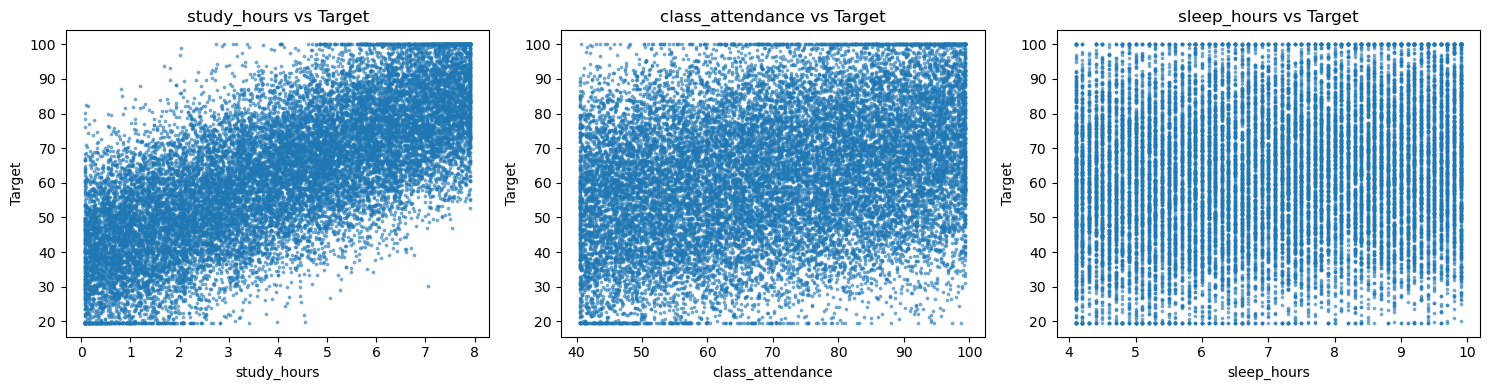

In [70]:
# Beispiel für Regression: Scatter Plots
fig, axes = plt.subplots(1, len(X.columns), figsize=(15, 4))
for i, col in enumerate(X.columns):
    axes[i].scatter(df_model[col], y, alpha=0.5, s=3)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Target')
    axes[i].set_title(f'{col} vs Target')
plt.tight_layout()
plt.show()


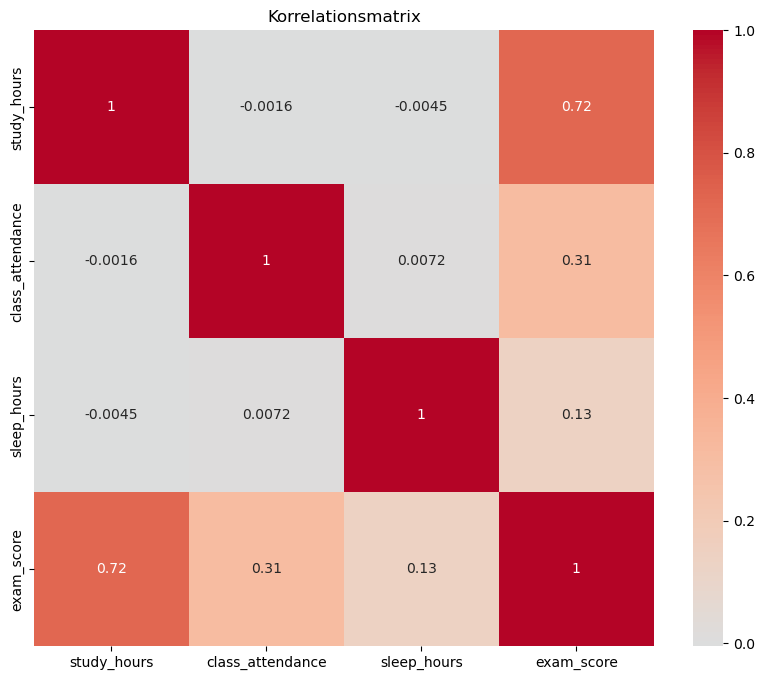

In [71]:
# Optional: Korrelationsmatrix (für Regression)
correlation_matrix = df_model.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Korrelationsmatrix')
plt.show()


**Ihre Beobachtungen:**
- Welche Features scheinen am wichtigsten?
  - study_hours, class_attendance, sleep_hours
  - age rausgenommen, weil zu wenig Korrelationen
- Gibt es klare Muster?
  - study_hours hat am meisten Korrelationen mit der exam_score
  - sleep_hours hat am wenigsten Korrelationen mit der exam_score

---
## 6. Train/Test Split

**Aufgabe:** Teilen Sie Ihre Daten in Trainings- und Testdaten auf.

**Warum?** 
- Training Set (80%): Modell lernt hier
- Test Set (20%): Modell wird hier evaluiert
- Verhindert Overfitting!

**Wichtig:** Testen Sie das Modell NIEMALS auf Trainingsdaten!

In [72]:
# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,      # 20% für Testing
    random_state=42     # Reproduzierbarkeit
)

print(f"Training Set: {len(X_train)} samples")
print(f"Test Set: {len(X_test)} samples")
print(f"\nTraining Set - Target Verteilung:")
# print(y_train.value_counts())  # Für Classification
print(y_train.describe())  # Für Regression


Training Set: 16000 samples
Test Set: 4000 samples

Training Set - Target Verteilung:
count    16000.000000
mean        62.543159
std         18.907275
min         19.599000
25%         48.800000
50%         62.700000
75%         76.300000
max        100.000000
Name: exam_score, dtype: float64


---
## 7A. ML Modelle - CLASSIFICATION

**⚠️ Nur für Classification-Probleme! Überspringen Sie diese Sektion, wenn Sie Regression machen.**

**Aufgabe:** Trainieren Sie verschiedene Classification-Modelle und vergleichen Sie sie.

**Algorithmen zum Ausprobieren:**
1. Nearest Centroid Classifier (NCC) - sehr einfach
2. K-Nearest Neighbors (KNN) - ähnlich zu NCC, aber flexibler
3. Decision Tree - findet Regeln automatisch
4. Logistic Regression - trotz Namen für Classification!

In [73]:
# Classification Algorithmen importieren
# from sklearn.neighbors import NearestCentroid, KNeighborsClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [74]:
# 1. Nearest Centroid Classifier
# print("=== Nearest Centroid Classifier ===")
# ncc = NearestCentroid()
# ncc.fit(X_train, y_train)
# y_pred_ncc = ncc.predict(X_test)
# accuracy_ncc = accuracy_score(y_test, y_pred_ncc)
# print(f"Accuracy: {accuracy_ncc:.2%}\n")


In [75]:
# 2. K-Nearest Neighbors
# print("=== K-Nearest Neighbors (KNN) ===")
# knn = KNeighborsClassifier(n_neighbors=5)
# knn.fit(X_train, y_train)
# y_pred_knn = knn.predict(X_test)
# accuracy_knn = accuracy_score(y_test, y_pred_knn)
# print(f"Accuracy: {accuracy_knn:.2%}\n")


In [76]:
# 3. Decision Tree
# print("=== Decision Tree ===")
# tree = DecisionTreeClassifier(max_depth=5, random_state=42)
# tree.fit(X_train, y_train)
# y_pred_tree = tree.predict(X_test)
# accuracy_tree = accuracy_score(y_test, y_pred_tree)
# print(f"Accuracy: {accuracy_tree:.2%}\n")


In [77]:
# 4. Logistic Regression
# print("=== Logistic Regression ===")
# logreg = LogisticRegression(max_iter=1000, random_state=42)
# logreg.fit(X_train, y_train)
# y_pred_logreg = logreg.predict(X_test)
# accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
# print(f"Accuracy: {accuracy_logreg:.2%}\n")


In [78]:
# Modellvergleich
# results = pd.DataFrame({
#     'Model': ['Nearest Centroid', 'KNN', 'Decision Tree', 'Logistic Regression'],
#     'Accuracy': [accuracy_ncc, accuracy_knn, accuracy_tree, accuracy_logreg]
# })
# results = results.sort_values('Accuracy', ascending=False)
# print("\n=== Modellvergleich ===")
# print(results.to_string(index=False))

# # Visualisierung
# plt.figure(figsize=(10, 5))
# plt.bar(results['Model'], results['Accuracy'])
# plt.title('Modellvergleich - Accuracy')
# plt.ylabel('Accuracy')
# plt.ylim(0, 1)
# plt.xticks(rotation=45)
# plt.grid(axis='y', alpha=0.3)
# for i, v in enumerate(results['Accuracy']):
#     plt.text(i, v + 0.02, f'{v:.2%}', ha='center')
# plt.tight_layout()
# plt.show()


---
## 7B. ML Modelle - REGRESSION

**⚠️ Nur für Regression-Probleme! Überspringen Sie diese Sektion, wenn Sie Classification gemacht haben.**

**Aufgabe:** Trainieren Sie verschiedene Regression-Modelle und vergleichen Sie sie.

**Algorithmen zum Ausprobieren:**
1. Linear Regression - einfache Gerade
2. K-Nearest Neighbors Regressor - Nachbarn-Durchschnitt
3. Decision Tree Regressor - findet nicht-lineare Muster
4. Random Forest Regressor - viele Bäume = robuster

In [79]:
# Regression Algorithmen importieren
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [80]:
# 1. Linear Regression
print("=== Linear Regression ===")
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f"RMSE: {rmse_lr:.2f}")
print(f"R² Score: {r2_lr:.2%}\n")


=== Linear Regression ===
RMSE: 11.51
R² Score: 62.96%



In [81]:
# 2. K-Nearest Neighbors Regressor
print("=== K-Nearest Neighbors Regressor ===")
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train, y_train)
y_pred_knn = knn_reg.predict(X_test)
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
r2_knn = r2_score(y_test, y_pred_knn)
print(f"RMSE: {rmse_knn:.2f}")
print(f"R² Score: {r2_knn:.2%}\n")


=== K-Nearest Neighbors Regressor ===
RMSE: 12.58
R² Score: 55.77%



In [82]:
# 3. Decision Tree Regressor
print("=== Decision Tree Regressor ===")
tree_reg = DecisionTreeRegressor(max_depth=5, random_state=42)
tree_reg.fit(X_train, y_train)
y_pred_tree = tree_reg.predict(X_test)
mse_tree = mean_squared_error(y_test, y_pred_tree)
rmse_tree = np.sqrt(mse_tree)
r2_tree = r2_score(y_test, y_pred_tree)
print(f"RMSE: {rmse_tree:.2f}")
print(f"R² Score: {r2_tree:.2%}\n")


=== Decision Tree Regressor ===
RMSE: 12.15
R² Score: 58.70%



In [83]:
# 4. Random Forest Regressor
print("=== Random Forest Regressor ===")
rf = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"RMSE: {rmse_rf:.2f}")
print(f"R² Score: {r2_rf:.2%}\n")


=== Random Forest Regressor ===
RMSE: 11.83
R² Score: 60.88%




=== Modellvergleich ===
            Model      RMSE  R² Score
Linear Regression 11.510489  0.629599
    Random Forest 11.829052  0.608813
    Decision Tree 12.153816  0.587038
    KNN Regressor 12.577532  0.557742


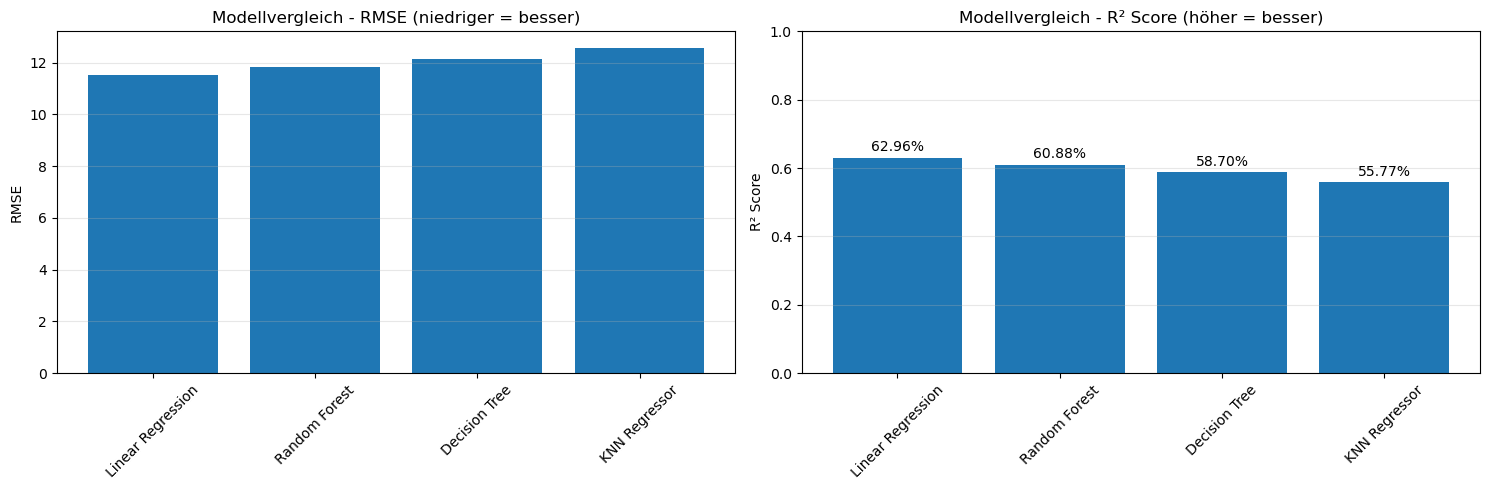

In [84]:
# Modellvergleich
results = pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'Decision Tree', 'Random Forest'],
    'RMSE': [rmse_lr, rmse_knn, rmse_tree, rmse_rf],
    'R² Score': [r2_lr, r2_knn, r2_tree, r2_rf]
})
results = results.sort_values('R² Score', ascending=False)
print("\n=== Modellvergleich ===")
print(results.to_string(index=False))

# Visualisierung
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# RMSE
ax1.bar(results['Model'], results['RMSE'])
ax1.set_title('Modellvergleich - RMSE (niedriger = besser)')
ax1.set_ylabel('RMSE')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(axis='y', alpha=0.3)

# R² Score
ax2.bar(results['Model'], results['R² Score'])
ax2.set_title('Modellvergleich - R² Score (höher = besser)')
ax2.set_ylabel('R² Score')
ax2.set_ylim(0, 1)
ax2.tick_params(axis='x', rotation=45)
ax2.grid(axis='y', alpha=0.3)
for i, v in enumerate(results['R² Score']):
    ax2.text(i, v + 0.02, f'{v:.2%}', ha='center')

plt.tight_layout()
plt.show()


---
## 8. Detaillierte Evaluation - Classification

**⚠️ Nur für Classification!**

**Aufgabe:** Analysieren Sie das beste Modell genauer.

**Metriken:**
- **Accuracy:** Anteil korrekter Vorhersagen
- **Confusion Matrix:** Welche Fehler macht das Modell?
- **Classification Report:** Precision, Recall, F1-Score pro Klasse

In [85]:
# Wählen Sie Ihr bestes Modell aus Sektion 7A
# best_model = knn  # Beispiel
# y_pred_best = y_pred_knn

# Classification Report
# print("=== Classification Report ===")
# print(classification_report(y_test, y_pred_best))


In [86]:
# Confusion Matrix
# cm = confusion_matrix(y_test, y_pred_best)
# plt.figure(figsize=(8, 6))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
# plt.title('Confusion Matrix')
# plt.ylabel('True Label')
# plt.xlabel('Predicted Label')
# plt.show()


**Interpretation der Confusion Matrix:**
- Diagonale: Korrekte Vorhersagen
- Außerhalb der Diagonalen: Fehler
- Welche Klassen werden am häufigsten verwechselt?

---
## 9. Detaillierte Evaluation - Regression

**⚠️ Nur für Regression!**

**Aufgabe:** Analysieren Sie das beste Modell genauer.

**Metriken:**
- **RMSE (Root Mean Squared Error):** Durchschnittlicher Fehler (in gleicher Einheit wie Target)
- **R² Score:** Wie gut erklärt das Modell die Varianz? (0-1, höher = besser)
- **Residual Plot:** Visualisierung der Fehler

In [87]:
# Wählen Sie Ihr bestes Modell aus Sektion 7B
# -> hier Linear Regression
best_model = lr
y_pred_best = y_pred_lr

# Alle Metriken
mse = mean_squared_error(y_test, y_pred_best)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_best)
r2 = r2_score(y_test, y_pred_best)

print("=== Evaluation Metriken ===")
print(f"Mean Squared Error (MSE): {mse:.2f}") # quadrierte Einheit
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}") # Wurzel der quadrierten Einheit
print(f"Mean Absolute Error (MAE): {mae:.2f}") # gleiche Einheit wie Target
print(f"R² Score: {r2:.2%}") # Wie gut ist die Vorhersage / Wie viel Varianz ? -> 1 == perfekte Vorhersage


=== Evaluation Metriken ===
Mean Squared Error (MSE): 132.49
Root Mean Squared Error (RMSE): 11.51
Mean Absolute Error (MAE): 9.32
R² Score: 62.96%


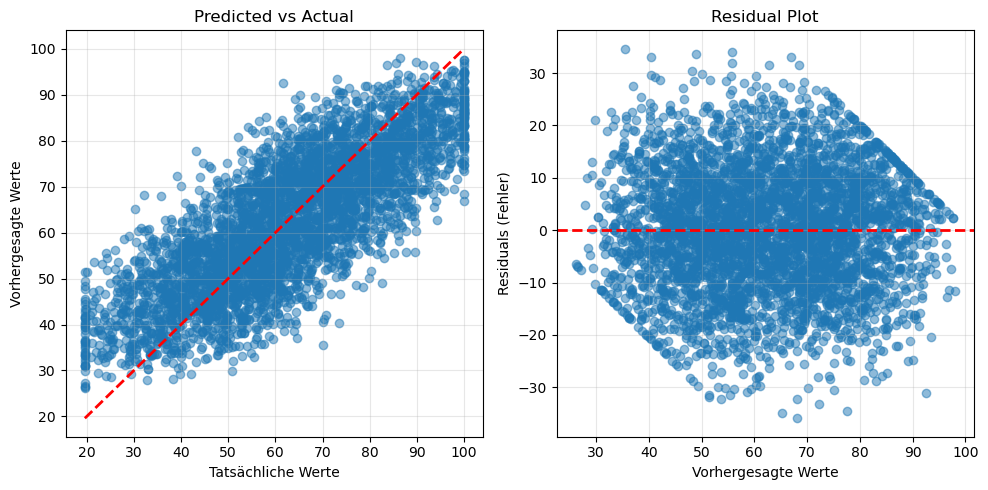

In [88]:
# Visualisierung: Predicted vs. Actual
plt.figure(figsize=(10, 5))

# Plot 1: Predicted vs Actual
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_best, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Tatsächliche Werte')
plt.ylabel('Vorhergesagte Werte')
plt.title('Predicted vs Actual')
plt.grid(True, alpha=0.3)

# Plot 2: Residuals (Fehler)
plt.subplot(1, 2, 2)
residuals = y_test - y_pred_best
plt.scatter(y_pred_best, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel('Vorhergesagte Werte')
plt.ylabel('Residuals (Fehler)')
plt.title('Residual Plot')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


**Interpretation:**
- **Predicted vs Actual:** Punkte sollten nahe der roten Linie liegen
- **Residual Plot:** Fehler sollten zufällig um 0 verteilt sein (kein Muster!)

---
## 10. Feature Importance (Optional)

**Aufgabe:** Finden Sie heraus, welche Features am wichtigsten sind.

**Hinweis:** Funktioniert nur für Decision Trees und Random Forests!

=== Feature Importance ===
         Feature  Importance
     study_hours    0.837936
class_attendance    0.158981
     sleep_hours    0.003083


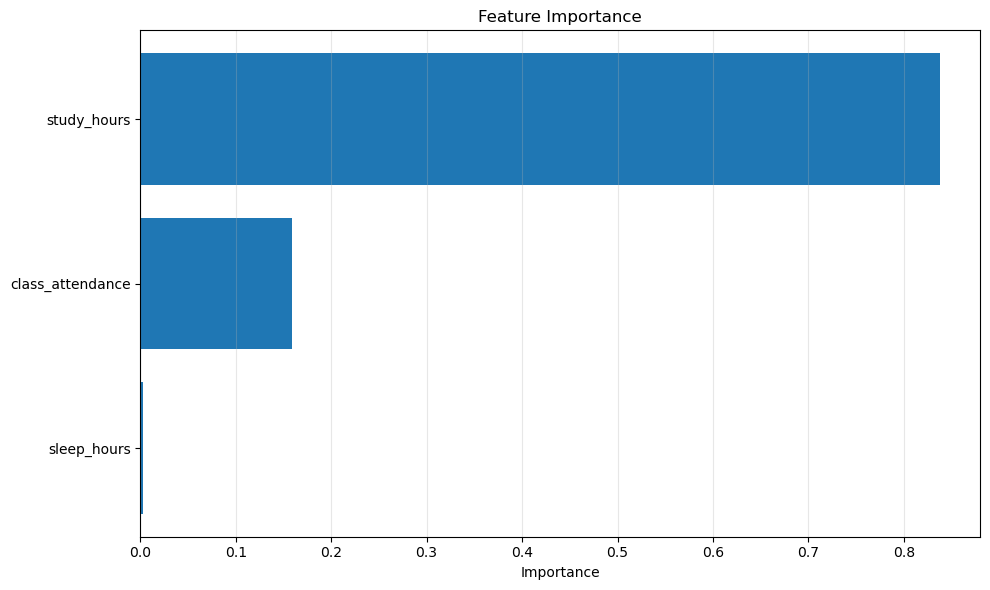

In [89]:
# Feature Importance für Decision Tree oder Random Forest
# Wählen Sie Ihr Tree-basiertes Modell:
# model_with_importance = rf  # oder rf, tree_reg, etc.
model_with_importance = tree_reg  # oder rf, tree_reg, etc.

importances = model_with_importance.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values('Importance', ascending=False)

print("=== Feature Importance ===")
print(feature_importance_df.to_string(index=False))

# Visualisierung
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()


---
## 11. Vorhersagen auf neuen Daten

**Aufgabe:** Machen Sie Vorhersagen für neue, hypothetische Datenpunkte. Sie können z.B. per genAI neue Daten

**Hinweis:** Dies zeigt, wie Ihr Modell in der Praxis verwendet werden könnte!

In [90]:
# Beispiel: Neue Datenpunkte definieren
new_data = pd.DataFrame({
    'study_hours': [8.0],
    'class_attendance': [100.0],
    'sleep_hours': [8.0]
})

# Vorhersage mit bestem Modell
prediction = best_model.predict(new_data)
print(f"Vorhersage für neue Daten: {prediction[0]}")

# Für Classification: Wahrscheinlichkeiten anzeigen
# if hasattr(best_model, 'predict_proba'):
#     probabilities = best_model.predict_proba(new_data)
#     print(f"Wahrscheinlichkeiten: {probabilities[0]}")


Vorhersage für neue Daten: 97.67645810859815


---
## 12. Reflexion und Dokumentation

**Dokumentieren Sie Ihre Arbeit:**

Beantworten Sie folgende Fragen:

### Ihre Reflexion:

**1. Problem-Typ und Forschungsfrage:**
   - Welches Problem haben Sie gelöst (Classification/Regression)?
      - Regression
   - Wie lautete Ihre Forschungsfrage?
      - "Can we predict exam scores based on a student’s academic behavior, study habits, lifestyle routines, and exam conditions?"

**2. Features und Target:**
   - Welche Features haben Sie verwendet?
      - study_hours, class_attendance, sleep_hours
   - Warum haben Sie diese Features gewählt?
      - haben eine bedeutende Korrelation mit der Target Variable
   - Was ist Ihre Target-Variable?
      - exam_score

**3. Modellvergleich:**
   - Welches Modell hat am besten performt?
      - 
   - Wie gut ist die Performance (Accuracy/R²)?
      - 
   - Überrascht Sie das Ergebnis?
      - 

**4. Interpretation:**
   - Welche Features sind am wichtigsten?
      - study_hours, class_attendance, (sleep_hours)
   - Macht das Sinn für Ihr Problem?
      - Ja
   - Welche Fehler macht das Modell?
      - 

**5. Herausforderungen:**
   - Welche Schwierigkeiten gab es?
   - Wie haben Sie diese gelöst?
   - Was würden Sie beim nächsten Mal anders machen?
   - ...

**6. Nächste Schritte:**
   - Wie könnten Sie das Modell verbessern?
   - Mehr Features? Besseres Feature Engineering?
   - Andere Algorithmen?
   - Werden Sie ML in Ihrer Streamlit-App verwenden?
   - ...

---
## 13. Modell speichern (Optional)

**Aufgabe:** Speichern Sie Ihr bestes Modell, um es später in Streamlit zu verwenden.

**Hinweis:** Dies ist optional! Sie können auch direkt in Streamlit ein neues Modell trainieren.

In [91]:
# Modell speichern mit pickle
import pickle

with open('../models/exam_score_prediction_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

print("Modell wurde gespeichert!")

# Später laden:
with open('../models/exam_score_prediction_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)


Modell wurde gespeichert!


---
## Zusammenfassung

**Sie haben in dieser Übung:**
- ✅ Ihr ML-Problem identifiziert (Classification/Regression)
- ✅ Features und Target definiert
- ✅ Train/Test Split durchgeführt
- ✅ Mehrere ML-Algorithmen trainiert und verglichen
- ✅ Das beste Modell evaluiert
- ✅ Feature Importance analysiert (optional)
- ✅ Vorhersagen auf neuen Daten gemacht

**Nächste Woche (Woche 10):**
- Machine Learning 2: Fortgeschrittene Evaluation
- Streamlit Einführung: Erste Web-App erstellen

**Tipp für Streamlit:**
- Nicht jedes Projekt braucht ML!
- Visualisierungen und explorative Analysen sind oft wertvoller
- Falls ML passt: Integrieren Sie Vorhersagen in Ihre App